In [1]:
%run Imports.ipynb
%run DataFrameBuilder.ipynb
%run ModelBuilder.ipynb
%run ModelEvaluator.ipynb

C:\Users\kriza\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Last value Predict
  - model predikujuci narast/pokles na zaklade posledneho pohybu ceny

In [53]:
def LoadAndCreateLastMove(dataset = 'binary'):
    if dataset == 'binary':
        df =LoadBaseDatasetForTwoClass()
    elif dataset == 'multiple':
        df =LoadBaseDatasetForThreeClass()
    df.target = np.where(df.target == 'Rise', 1, 0)
    df['lastMove'] = df.target
    df['lastMove'] = df['lastMove'].shift(1)
    df = df.shift(-1)
    df.drop(df.tail(1).index,inplace=True)
    return df.target.values, df.lastMove.values

In [58]:
def PredictViaLastMove(dataset = 'binary'):
    from sklearn import metrics
    y_test, y_pred = LoadAndCreateLastMove(dataset = dataset)
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))

In [59]:
PredictViaLastMove(dataset = 'binary')

              precision    recall  f1-score   support

         0.0       0.41      0.41      0.41      3488
         1.0       0.44      0.44      0.44      3662

    accuracy                           0.43      7150
   macro avg       0.43      0.43      0.43      7150
weighted avg       0.43      0.43      0.43      7150

0.4286713286713287
0.4283293676939959


In [43]:
PredictViaLastMove(dataset = 'multiple')

              precision    recall  f1-score   support

        Fall       0.26      0.26      0.26      2319
        Rise       0.28      0.28      0.28      2427
        Stay       0.41      0.41      0.41      2404

    accuracy                           0.32      7150
   macro avg       0.32      0.32      0.32      7150
weighted avg       0.32      0.32      0.32      7150

0.3174825174825175


In [63]:
resultDf = OpenTwoClassResult()

In [64]:
resultDf.head()

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
0,Random Forest,window_size: 0 max_depth: 5 min_samples_split...,0.569317,0.564536,0.578917,0.673016,0.463632,0.613253,0.513742
1,Random Forest,window_size: 0 max_depth: 5 min_samples_split...,0.578747,0.582874,0.572896,0.671862,0.477996,0.624066,0.520960
2,Random Forest,window_size: 0 max_depth: 5 min_samples_split...,0.568614,0.571776,0.565515,0.655681,0.476829,0.610309,0.516543
3,Random Forest,window_size: 0 max_depth: 5 min_samples_split...,0.563125,0.553081,0.581995,0.679338,0.447670,0.608912,0.504820
4,Random Forest,window_size: 0 max_depth: 5 min_samples_split...,0.578184,0.582906,0.573508,0.670796,0.479701,0.622949,0.521247


In [87]:
resultDf.sort_values('Accuracy', ascending=False).head(50)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
1122,ARIMA,p: 1 d: 0 q: 1,0.606615,0.600240,0.615646,0.688705,0.520863,0.641437,0.564302
1116,ARIMA,p: 0 d: 0 q: 2,0.605911,0.599760,0.614601,0.687328,0.520863,0.640565,0.563863
1115,ARIMA,p: 0 d: 0 q: 1,0.604504,0.598321,0.613288,0.687328,0.517986,0.639744,0.561622
1125,ARIMA,p: 2 d: 0 q: 0,0.602393,0.597576,0.609060,0.679063,0.522302,0.635719,0.562355
1126,ARIMA,p: 2 d: 0 q: 1,0.598874,0.593301,0.606838,0.683196,0.510791,0.635083,0.554688
1129,ARIMA,p: 4 d: 0 q: 0,0.598170,0.592814,0.605802,0.681818,0.510791,0.634209,0.554254
1121,ARIMA,p: 1 d: 0 q: 0,0.596763,0.595745,0.598071,0.655647,0.535252,0.624262,0.564920
1130,ARIMA,p: 4 d: 0 q: 1,0.593948,0.590085,0.599327,0.672176,0.512230,0.628461,0.552366
1090,Linear Regression,window_size: 2 normalize: True,0.589437,0.592497,0.585781,0.630854,0.546110,0.611074,0.565250
1091,Linear Regression,window_size: 2 normalize: False,0.589437,0.592497,0.585781,0.630854,0.546110,0.611074,0.565250


In [88]:
resultDf.sort_values('PrecisionRise', ascending=False).head(5)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
1094,Linear Regression,window_size: 5 normalize: True,0.576056,0.601639,0.556790,0.505510,0.649856,0.549401,0.599734
1095,Linear Regression,window_size: 5 normalize: False,0.576056,0.601639,0.556790,0.505510,0.649856,0.549401,0.599734
1122,ARIMA,p: 1 d: 0 q: 1,0.606615,0.600240,0.615646,0.688705,0.520863,0.641437,0.564302
1116,ARIMA,p: 0 d: 0 q: 2,0.605911,0.599760,0.614601,0.687328,0.520863,0.640565,0.563863
1100,Linear Regression,window_size: 0 normalize: True rolling approach,0.585503,0.598846,0.572802,0.571625,0.600000,0.584919,0.586086


In [72]:
resultDf.sort_values('PrecisionFall', ascending=False).head(5)

,Model,Parameters,Accuracy,PrecisionRise,PrecisionFall,RecallRise,RecalFall,F1Rise,F1Fall
1122,ARIMA,p: 1 d: 0 q: 1,0.606615,0.600240,0.615646,0.688705,0.520863,0.641437,0.564302
1116,ARIMA,p: 0 d: 0 q: 2,0.605911,0.599760,0.614601,0.687328,0.520863,0.640565,0.563863
1115,ARIMA,p: 0 d: 0 q: 1,0.604504,0.598321,0.613288,0.687328,0.517986,0.639744,0.561622
1125,ARIMA,p: 2 d: 0 q: 0,0.602393,0.597576,0.609060,0.679063,0.522302,0.635719,0.562355
1126,ARIMA,p: 2 d: 0 q: 1,0.598874,0.593301,0.606838,0.683196,0.510791,0.635083,0.554688


In [75]:
df = pd.read_csv('data/data_e1.csv')
dfl = pd.read_csv('data/cleardata.csv', encoding='utf-16')
dfl = dfl.head(4776)

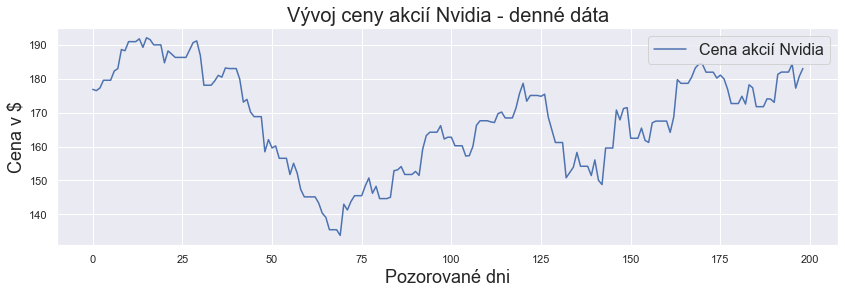

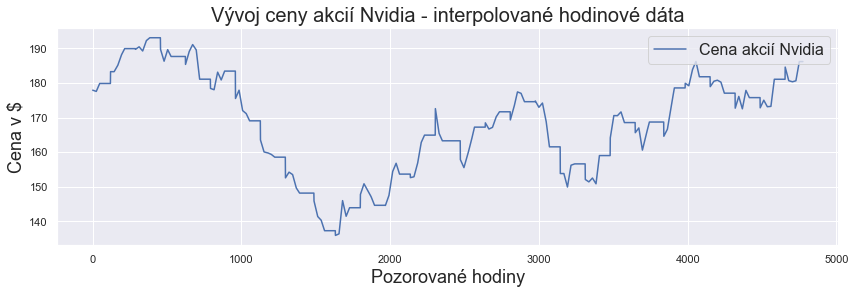

In [81]:
plt.figure(figsize = (14,4))
plt.title(f'Vývoj ceny akcií Nvidia - denné dáta', fontsize = 20)
plt.xlabel("Pozorované dni", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(df.nvidia_price, label='Cena akcií Nvidia')
plt.legend(loc="upper right", prop={'size' : 16})
plt.figure(figsize = (14,4))

plt.title(f'Vývoj ceny akcií Nvidia - interpolované hodinové dáta', fontsize = 20)
plt.xlabel("Pozorované hodiny", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(dfl.nvidia_price, label='Cena akcií Nvidia')
plt.legend(loc="upper right", prop={'size': 16})


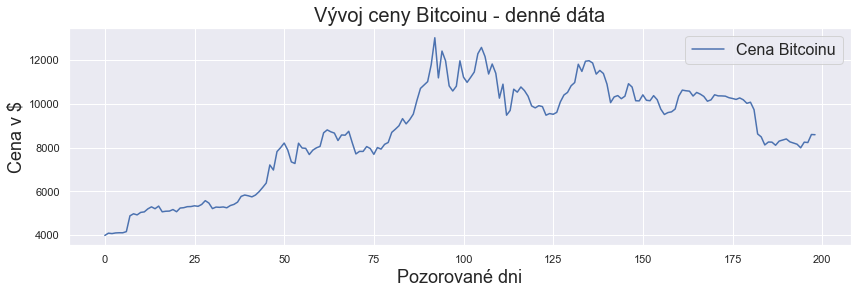

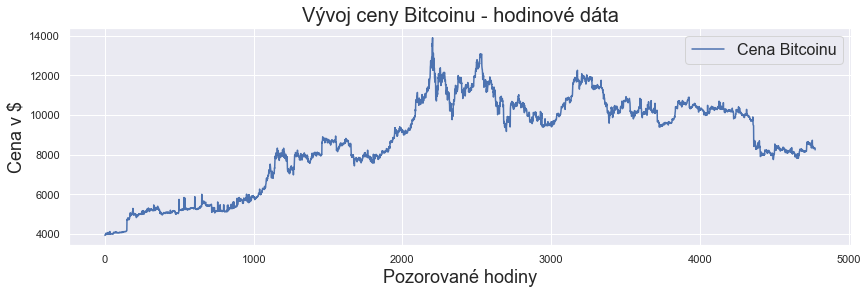

In [83]:
plt.figure(figsize = (14,4))
plt.title(f'Vývoj ceny Bitcoinu - denné dáta', fontsize = 20)
plt.xlabel("Pozorované dni", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(df.close_price, label='Cena Bitcoinu')
plt.legend(loc="upper right", prop={'size' : 16})
plt.figure(figsize = (14,4))

plt.title(f'Vývoj ceny Bitcoinu - hodinové dáta', fontsize = 20)
plt.xlabel("Pozorované hodiny", fontsize = 18)
plt.ylabel("Cena v $", fontsize = 18)
plt.grid(True)
plt.plot(dfl.price_close, label='Cena Bitcoinu')
plt.legend(loc="upper right", prop={'size' : 16})